In [66]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import cycle
%matplotlib inline  
from matplotlib.font_manager import FontProperties

In [2]:
def find_routes_with_ten_readings(df, route_numbers, min_num_readings=10, verbose=False):
    routes = []
    
    for number in route_numbers:
        route_df = df[df['route_number'] == number]
        
        if len(route_df) >= min_num_readings:
            routes.append(route_df)
        elif verbose:
            print('Route: ', number, ' only has ', len(route_df), ' readings!')
    
    print('Found', len(routes), 'routes that have', min_num_readings, 'or more readings')
    
    return pd.concat(routes)


def load_csv_as_df(file_name, sub_directories, column_numbers=None, column_names=None):
    '''
    Load any csv as a pandas dataframe. Provide the filename, the subdirectories, and columns to read(if desired).
    '''
    base_path = os.getcwd()
    full_path = base_path + sub_directories + file_name

    if column_numbers is not None:
        df = pd.read_csv(full_path, usecols=column_numbers)
    else:
        df = pd.read_csv(full_path)

    if column_names is not None:
        df.columns = column_names
    
    route_ids = df['route_number'].unique()
    return find_routes_with_ten_readings(df, route_ids, min_num_readings=10)


def load_google_map_dfs():
    column_names = ['latitude', 'longitude']
    file_names = ['BottomRoute.csv', 'MiddleRoute.csv', 'TopRoute.csv', 'TrainToAirMiddle.csv']
    base_path = os.getcwd()

    bottom_df = pd.read_csv(base_path + '/' + file_names[0])
    bottom_df.columns = column_names

    middle_df = pd.read_csv(base_path + '/' + file_names[1])
    middle_df.columns = column_names
    
    middle_df2 = pd.read_csv(base_path + '/' + file_names[3])
    middle_df2.columns = column_names

    top_df = pd.read_csv(base_path + '/' + file_names[2])
    top_df.columns = column_names
    
    return bottom_df, middle_df, middle_df2, top_df

In [6]:
train_df = load_csv_as_df('all-train-to-air-routes-with-cells.csv', '/')
air_df = load_csv_as_df('all-air-to-train-routes-with-cells(1).csv', '/')

Found 17 routes that have 10 or more readings
Found 21 routes that have 10 or more readings


In [7]:
bottom_df, middle_air_train_df, middle__train_air_df, top_df = load_google_map_dfs()

In [58]:
def graph_google_map_routes(dfs, title, one_color=False, return_plot=False, label=None):
    """
    Graphs all routes in list of data frames where each df is one route
    :param dfs: list of dataframes
    :param title: String title for plot
    :param one_color: bool use the same color for all lines
    :return: plot
    """
    color_count = 1
    colour_codes = map('C{}'.format, cycle(range(50)))
    
    added_label = False

    for df in dfs:
        long = df['longitude'].tolist()
        lat = df['latitude'].tolist()
        colour_code = next(colour_codes)

        if one_color:
            if label is not None and not added_label:
                plt.plot(long, lat, color='g', label=label)
                added_label = True
            else:
                plt.plot(long, lat, color='g')
        else:
            plt.plot(long, lat, color=colour_code)
            color_count += 1

    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticklabels([])
    frame1.axes.yaxis.set_ticklabels([])

    if return_plot:
        return plt
    else:
        plt.savefig(title + '.png')
        plt.show()

        
def add_route_to_plot(plot, route_df, color='r', label=None, verbose=False):
    long = route_df['longitude'].tolist()
    lat = route_df['latitude'].tolist()

    route_number = route_df['route_number'].unique()

    if verbose:
        print('Added route ', route_number[0], ' with color ', '\'', color, '\'')

    if label is not None:
        plot.plot(long, lat, color=color, label=label)
    else:
        plot.plot(long, lat, color=color)

    return plot


def add_routes_to_plot(plot, df):
    route_numbers = df['route_number'].unique()

    for route_number in route_numbers:
        route_data = df[df['route_number'] == route_number]

        long = route_data['longitude'].tolist()
        lat = route_data['latitude'].tolist()

        plot.plot(long, lat, color='r')

    return plot


def plot_actual_routes_with_google_maps_routes(google_map_dfs, title, route_df):
    plot = graph_google_map_routes(google_map_dfs, title, one_color=True, return_plot=True)

    plot = add_routes_to_plot(plot, route_df)

    plot.savefig(title + '.png')
    plot.show()

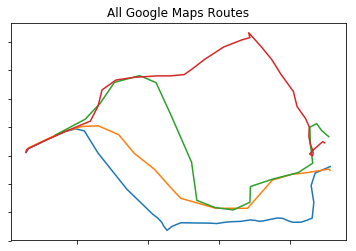

In [9]:
# Graphs all routes from Google Maps
graph_google_map_routes([bottom_df, middle_air_train_df, middle__train_air_df, top_df], 'All Google Maps Routes')

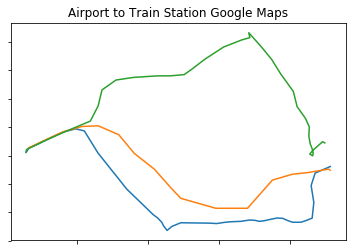

In [10]:
# Graphs Airport to Train from Google Maps
graph_google_map_routes([bottom_df, middle_air_train_df, top_df], 'Airport to Train Station Google Maps')

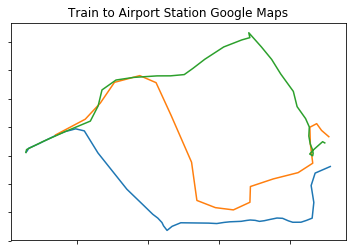

In [11]:
# Graph Train to Airport from Google Maps
graph_google_map_routes([bottom_df, middle__train_air_df, top_df], 'Train to Airport Station Google Maps')

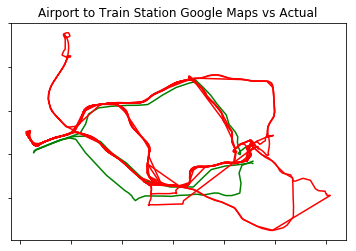

In [12]:
# Air to train
plot_actual_routes_with_google_maps_routes([bottom_df, middle_air_train_df, top_df], 'Airport to Train Station Google Maps vs Actual', air_df)

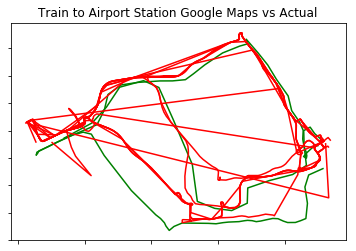

In [13]:
plot_actual_routes_with_google_maps_routes([bottom_df, middle__train_air_df, top_df], 'Train to Airport Station Google Maps vs Actual', train_df)

In [28]:
def plot_suspected_fraud_vs_google_maps(google_map_dfs, route_number, df, title, show=True):
    plot = graph_google_map_routes(google_map_dfs, title, one_color=True, return_plot=True)

    route_df = df[df['route_number'] == route_number]
    print('Route ', route_number, ' has ', len(route_df), ' readings!')

    plot = add_route_to_plot(plot, route_df)
    plot.savefig(title + '.png')

    if show:
        plot.show()
    else:
        plot.clf()

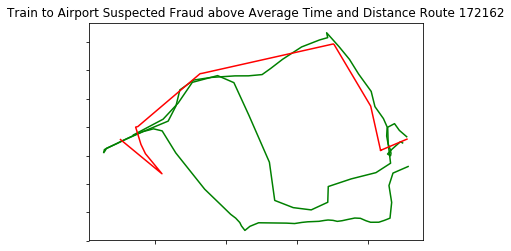

In [25]:
plot_title = 'Train to Airport Suspected Fraud above Average Time and Distance Route 172162'
plot_suspected_fraud_vs_google_maps([bottom_df, middle__train_air_df, top_df], 172162, train_df, plot_title)

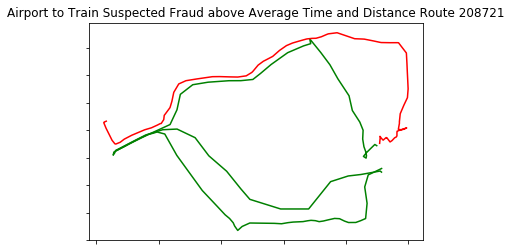

In [16]:
plot_title = 'Airport to Train Suspected Fraud above Average Time and Distance Route 208721'
plot_suspected_fraud_vs_google_maps([bottom_df, middle_air_train_df, top_df], 208721, air_df, plot_title)

In [35]:
def graph_all_routes_against_google_maps(df, google_maps_dfs, air_to_train=True):
    route_numbers = df['route_number'].unique()

    for route_number in route_numbers:
        if air_to_train:
            plot_title = 'Airport to Train Route ' + str(route_number)
        else:
            plot_title = 'Train to Airport Route ' + str(route_number)

        plot_suspected_fraud_vs_google_maps(google_maps_dfs, route_number, df, plot_title, show=False)

    print('Done creating route graphs!')
    return

In [33]:
graph_all_routes_against_google_maps(air_df, [bottom_df, middle_air_train_df, top_df], air_to_train=True)

Route  2199  has  153  readings!
Route  68764  has  82  readings!
Route  77076  has  129  readings!
Route  88126  has  100  readings!
Route  157306  has  142  readings!
Route  161621  has  142  readings!
Route  164730  has  287  readings!
Route  178778  has  64  readings!
Route  208721  has  125  readings!
Route  228565  has  86  readings!
Route  235842  has  51  readings!
Route  262969  has  35  readings!
Route  277593  has  181  readings!
Route  293275  has  53  readings!
Route  297166  has  73  readings!
Route  320657  has  983  readings!
Route  329370  has  57  readings!
Route  337840  has  713  readings!
Route  343667  has  63  readings!
Route  344327  has  42  readings!
Route  433086  has  35  readings!
Done creating route graphs!


<Figure size 432x288 with 0 Axes>

In [34]:
graph_all_routes_against_google_maps(train_df, [bottom_df, middle__train_air_df, top_df], air_to_train=False)

Route  324340  has  21  readings!
Route  375971  has  88  readings!
Route  428977  has  340  readings!
Route  445438  has  157  readings!
Route  36889  has  360  readings!
Route  46545  has  39  readings!
Route  54009  has  302  readings!
Route  64320  has  94  readings!
Route  67941  has  250  readings!
Route  83557  has  196  readings!
Route  88127  has  139  readings!
Route  91078  has  350  readings!
Route  150097  has  46  readings!
Route  158727  has  195  readings!
Route  161480  has  134  readings!
Route  164729  has  305  readings!
Route  172162  has  20  readings!
Done creating route graphs!


<Figure size 432x288 with 0 Axes>

In [73]:
def graph_everything_with_labels(df, google_maps_dfs, fraud_numbers, title, error_numbers=None, show_errors=False):
    # Graph Google Maps Routes (In Green)
    plot = graph_google_map_routes(google_maps_dfs, title, one_color=True, return_plot=True, label='Google Maps')

    # Add the rest of the routes
    route_numbers = df['route_number'].unique()

    # Add booleans for label
    added_fraud_label = False
    added_error_label = False
    added_normal_label = False

    for route_number in route_numbers:
        route_df = df[df['route_number'] == route_number]

        if route_number in fraud_numbers:
            # print()
            # print('Fraud added ', route_number)
            if not added_fraud_label:
                plot = add_route_to_plot(plot, route_df, color='r', label='Fraud')
                added_fraud_label = True
            else:
                plot = add_route_to_plot(plot, route_df, color='r')

        elif error_numbers is not None and route_number in error_numbers:
            if show_errors:
                if not added_error_label:
                    plot = add_route_to_plot(plot, route_df, color='y', label='Error')
                    added_error_label = True
                else:
                    plot = add_route_to_plot(plot, route_df, color='y')

        else:
            if not added_normal_label:
                # print()
                # print('Normal added ', route_number)
                plot = add_route_to_plot(plot, route_df, color='b', label='Normal')
                added_normal_label = True
            else:
                plot = add_route_to_plot(plot, route_df, color='b')

    plot.savefig(title + '.png')
    font_prop = FontProperties()
    font_prop.set_size('small')
    plot.legend(prop=font_prop)
    plot.show()
    return

## Baseline Above Average Distance & Time

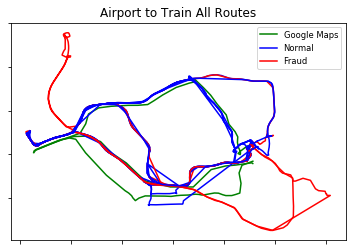

In [69]:
google_maps_dfs = [bottom_df, middle_air_train_df, top_df]
fraud_numbers = [329370, 320657, 293275, 235842, 208721]
title = 'Airport to Train All Routes'
graph_everything_with_labels(air_df, google_maps_dfs, fraud_numbers, title, error_numbers=None, show_errors=False)

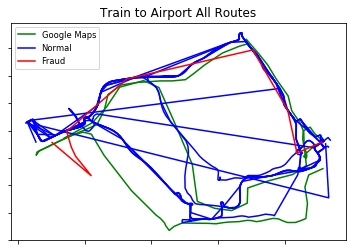

In [70]:
google_maps_dfs = [bottom_df, middle__train_air_df, top_df]
fraud_numbers = [172162]
title = 'Train to Airport All Routes'
graph_everything_with_labels(train_df, google_maps_dfs, fraud_numbers, title, error_numbers=None, show_errors=False)

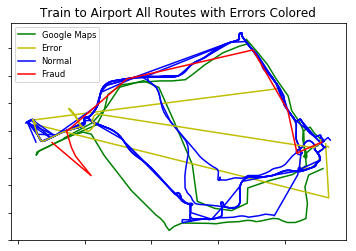

In [71]:
google_maps_dfs = [bottom_df, middle__train_air_df, top_df]
fraud_numbers = [172162]
error_numbers = [375971, 324340, 164729]
title = 'Train to Airport All Routes with Errors Colored'
graph_everything_with_labels(train_df, google_maps_dfs, fraud_numbers, title, error_numbers=error_numbers, show_errors=True)

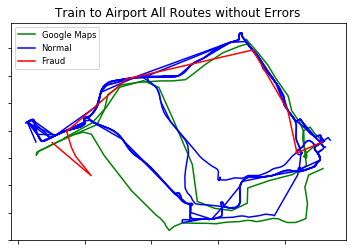

In [74]:
google_maps_dfs = [bottom_df, middle__train_air_df, top_df]
fraud_numbers = [172162]
error_numbers = [375971, 324340, 164729]
title = 'Train to Airport All Routes without Errors'
graph_everything_with_labels(train_df, google_maps_dfs, fraud_numbers, title, error_numbers=error_numbers, show_errors=False)

## Sub-Sequence

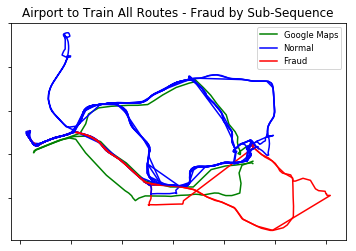

In [78]:
google_maps_dfs = [bottom_df, middle_air_train_df, top_df]
fraud_numbers = [157306, 293275, 329370]
title = 'Airport to Train All Routes - Fraud by Sub-Sequence'
graph_everything_with_labels(air_df, google_maps_dfs, fraud_numbers, title, error_numbers=None, show_errors=False)

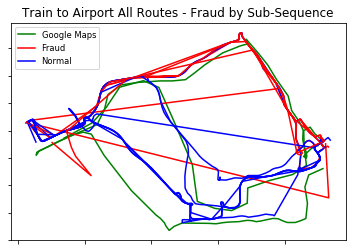

In [79]:
google_maps_dfs = [bottom_df, middle__train_air_df, top_df]
fraud_numbers = [324340, 172162, 375971, 36889, 64320, 83557, 150097]
title = 'Train to Airport All Routes - Fraud by Sub-Sequence'
graph_everything_with_labels(train_df, google_maps_dfs, fraud_numbers, title, error_numbers=None, show_errors=False)

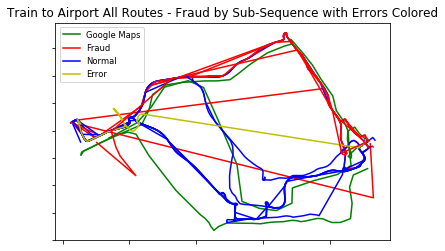

In [80]:
google_maps_dfs = [bottom_df, middle__train_air_df, top_df]
fraud_numbers = [324340, 172162, 375971, 36889, 64320, 83557, 150097]
error_numbers = [375971, 324340, 164729]
title = 'Train to Airport All Routes - Fraud by Sub-Sequence with Errors Colored'
graph_everything_with_labels(train_df, google_maps_dfs, fraud_numbers, title, error_numbers=error_numbers, show_errors=True)

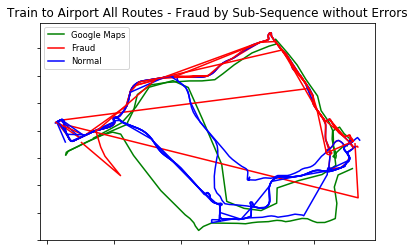

In [81]:
google_maps_dfs = [bottom_df, middle__train_air_df, top_df]
fraud_numbers = [324340, 172162, 375971, 36889, 64320, 83557, 150097]
error_numbers = [375971, 324340, 164729]
title = 'Train to Airport All Routes - Fraud by Sub-Sequence without Errors'
graph_everything_with_labels(train_df, google_maps_dfs, fraud_numbers, title, error_numbers=error_numbers, show_errors=False)